To generate the pickle file:

    cd CEO/src
    python -m main.azure_rl --get-training-progress ../notebooks/progress.pkl


In [2]:
# Load the pickle file
import pickle

with open("progress.pkl", "rb") as f:
    data = pickle.load(f)
    
print("data keys", data.keys())
progress_df = data["progress"]
trainings_df = data["trainings"]
trainings_df.sort_values("final_pct_win", inplace=True, ascending=False)
display(trainings_df.shape)
display(progress_df.shape)

data keys dict_keys(['trainings', 'progress'])


(12, 6)

(3471, 7)

In [3]:
trainings_df

,training_id,learning_type,start,end,finished,final_pct_win
5,tid_c91a81fd-aade-423d-b557-8a511f7de98c,qlearning,2022-01-29 03:31:51.881297,2022-01-30 10:37:32.624790,True,0.7259
0,tid_9cbe0311-bc20-43c8-8944-a01928cfc3e5,qlearning,2022-01-29 03:31:39.703912,2022-01-30 09:34:11.759066,True,0.7104
6,tid_1176c4a7-1240-410f-9795-350ecd9562bd,qlearning,2022-01-29 03:34:45.747892,2022-01-30 10:02:39.939470,True,0.7022
4,tid_0630f456-d1e8-4f02-9742-33b3ac30f100,qlearning,2022-01-29 03:31:51.396954,2022-01-30 09:42:25.145468,True,0.6980
11,tid_95e80c75-2276-4d62-9c5c-a37fc8446485,qlearning_traces,2022-02-01 03:13:03.814318,2022-02-01 22:34:27.324596,True,0.6495
1,tid_f6bff040-f5e8-4df2-85b0-15d0fa286375,qlearning_traces,2022-01-29 03:31:44.569672,2022-01-30 00:28:30.505983,True,0.6482
8,tid_d4a57c1c-1d02-4654-a031-6ebcbb658948,qlearning_traces,2022-01-29 03:34:45.778839,2022-01-30 14:13:51.917339,True,0.6377
7,tid_2a355bb1-5f07-4979-b645-2bb5503b65b8,qlearning_traces,2022-01-29 03:34:45.814157,2022-01-30 12:08:43.749506,True,0.6249
9,tid_91628ce2-93d8-4658-8665-7dd8ec211f16,qlearning_traces,2022-01-29 03:34:45.767191,2022-01-30 11:06:33.644506,True,0.6114
2,tid_21922942-8f6e-4e74-9267-dfa2d978cacf,qlearning_traces,2022-01-29 03:31:45.786019,2022-01-30 13:10:53.943939,True,0.6051


In [4]:
progress_df

,training_id,episode,avg_rewards,recent_rewards,states_visited,explore_rate,pct_win
0,tid_9cbe0311-bc20-43c8-8944-a01928cfc3e5,88000,-0.178682,-0.0802,97195,0.006083,NaN
1,tid_9cbe0311-bc20-43c8-8944-a01928cfc3e5,144000,-0.119625,-0.0062,128872,0.005855,NaN
2,tid_9cbe0311-bc20-43c8-8944-a01928cfc3e5,202000,-0.079050,0.0342,156606,0.006030,NaN
3,tid_9cbe0311-bc20-43c8-8944-a01928cfc3e5,262000,-0.049511,0.0528,181464,0.006388,NaN
4,tid_9cbe0311-bc20-43c8-8944-a01928cfc3e5,322000,-0.024466,0.0896,203276,0.006220,NaN
...,...,...,...,...,...,...,...
3466,tid_95e80c75-2276-4d62-9c5c-a37fc8446485,19622000,0.314482,0.3108,1189402,0.061266,NaN
3467,tid_95e80c75-2276-4d62-9c5c-a37fc8446485,19714000,0.314507,0.3400,1189818,0.061770,NaN
3468,tid_95e80c75-2276-4d62-9c5c-a37fc8446485,19786000,0.314531,0.3172,1190171,0.061362,NaN
3469,tid_95e80c75-2276-4d62-9c5c-a37fc8446485,19878000,0.314593,0.3370,1190665,0.060766,NaN


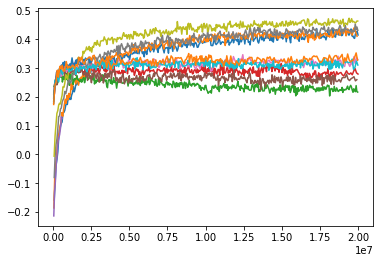

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plot_df = progress_df.pivot(index="episode", columns="training_id", values="recent_rewards")

xs = plot_df.index.to_series()

for column in plot_df.columns:
    series = plot_df[column]
    smask = np.isfinite(series)

    plt.plot(xs[smask], series[smask], linestyle='-', marker='')

plt.show()

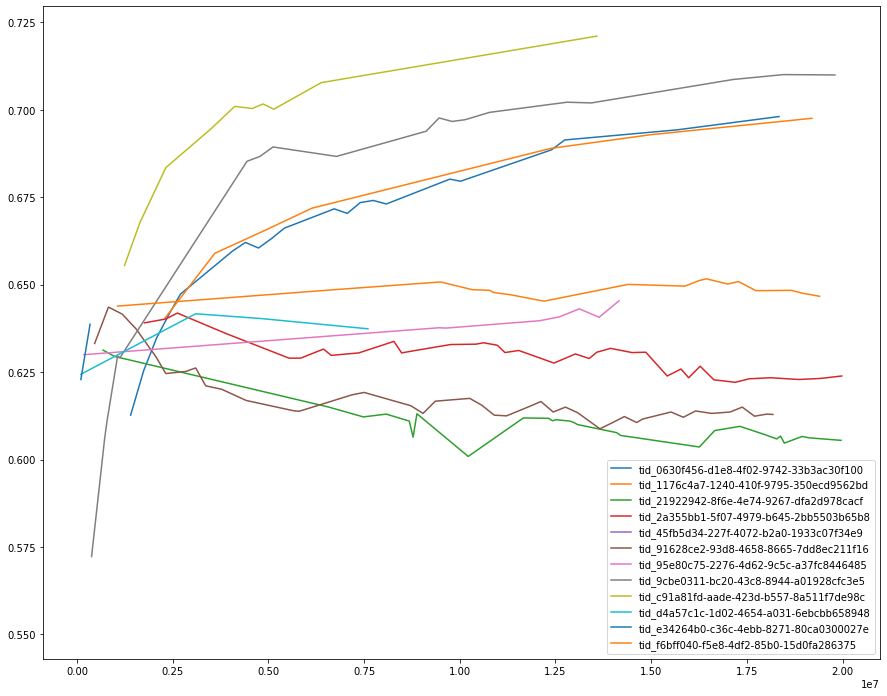

In [12]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (15,12)

plot_df = progress_df.pivot(index="episode", columns="training_id", values="pct_win")

xs = plot_df.index.to_series()

for column in plot_df.columns:
    series = plot_df[column]
    smask = np.isfinite(series)

    plt.plot(xs[smask], series[smask], linestyle='-', marker='', label=column)

plt.legend()
plt.show()

In [7]:
plot_df

training_id,tid_0630f456-d1e8-4f02-9742-33b3ac30f100,tid_1176c4a7-1240-410f-9795-350ecd9562bd,tid_21922942-8f6e-4e74-9267-dfa2d978cacf,tid_2a355bb1-5f07-4979-b645-2bb5503b65b8,tid_45fb5d34-227f-4072-b2a0-1933c07f34e9,tid_91628ce2-93d8-4658-8665-7dd8ec211f16,tid_95e80c75-2276-4d62-9c5c-a37fc8446485,tid_9cbe0311-bc20-43c8-8944-a01928cfc3e5,tid_c91a81fd-aade-423d-b557-8a511f7de98c,tid_d4a57c1c-1d02-4654-a031-6ebcbb658948,tid_e34264b0-c36c-4ebb-8271-80ca0300027e,tid_f6bff040-f5e8-4df2-85b0-15d0fa286375
episode,,,,,,,,,,,,
50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
19962000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19964000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19968000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
